<a href="https://colab.research.google.com/github/Clarice-Satiko-Aoto/Analise_dados_b/blob/main/vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando os dados

In [255]:
cat_produto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBCategoriaProduto.csv') #
cliente = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBCliente.csv') #
depara_cliente_vendedor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBClientesVendedores.csv')
geografia = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBGeografia.csv') #
itens_venda = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBItensVendas.csv')
produto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBProduto.csv') #
regioes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBRegioesBrasil.csv') #
supervisor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBSupervisor.csv') #
vendas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBVendas.csv')
vendedor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vendas/data/PBVendedor.csv') #

## Análise Exploratória dos Dados

### Transformando os dados

In [256]:
#Renomeando a coluna do cat_produto
cat_produto.rename(columns={'descricao': 'categoria'}, inplace=True)

In [257]:
vendedor.rename(columns={'descricao': 'nome_vendedor'}, inplace=True)
supervisor.rename(columns={'descricao': 'nome_supervisor', 'gerente_descricao': 'nome_gerente'}, inplace=True)

In [258]:
#renomeando a coluna id
vendas.rename(columns={'id': 'vendas_id',
                       'valor_bruto': 'nf_valor_bruto',
                       'valor_venda': 'nf_valor_venda'}, inplace=True
              )

In [259]:
#Transformando os tipos dos dados para podermos calcular os valores
vendas['nf_desconto'] = vendas['nf_desconto'].str.replace(',', '.', regex=True)
vendas['nf_desconto'] = pd.to_numeric(vendas['nf_desconto'], errors='coerce')

vendas['nf_valor_venda'] = vendas['nf_valor_venda'].str.replace(',', '.', regex=True)
vendas['nf_valor_venda'] = pd.to_numeric(vendas['nf_valor_venda'], errors='coerce')

In [260]:
#renomeando a coluna id
itens_venda.rename(columns={'id': 'itens_venda_id'}, inplace=True)

In [261]:
#juntando cat_produto e produto
dProduto = produto.merge(cat_produto, left_on='categoria_id', right_on='id', how='inner')
dProduto = dProduto.drop('id_y', axis=1)
dProduto.rename(columns={'id_x': 'produto_id'}, inplace=True)
dProduto.head()

,produto_id,categoria_id,descricao,tamanho,custoUnitario,categoria
0,1,1,Casual Day,M,90,Manga Longa
1,2,1,Casual Day,P,90,Manga Longa
2,3,1,Casual Day,G,90,Manga Longa
3,4,1,Psyco Universe,GG,60,Manga Longa
4,5,1,Psyco Universe,P,60,Manga Longa


In [262]:
#juntando cliente, geografia e regioes
dCliente = cliente.merge(geografia, left_on='geografia_id', right_on='id', how='inner')
dCliente = dCliente.merge(regioes, left_on='uf', right_on='UF')
dCliente = dCliente.drop(['id_y', 'geografia_id', 'uf'], axis=1)
dCliente.rename(columns={'id_x': 'cliente_id', 'descricao':'cliente'}, inplace=True)
dCliente.head()

,cliente_id,cliente,cidade,estado,UF,Regiao
0,1,Nolan Inc,Recife,Pernambuco,PE,Região 2
1,75,Blick-Dietrich,Recife,Pernambuco,PE,Região 2
2,144,"Gleason, Legros and Jaskolski",Recife,Pernambuco,PE,Região 2
3,154,Beier-Gerlach,Recife,Pernambuco,PE,Região 2
4,157,Howell and Sons,Recife,Pernambuco,PE,Região 2


In [263]:
#fazendo o de para dcliente e vendedor
dCliente = dCliente.merge(depara_cliente_vendedor, left_on='cliente_id', right_on='cliente_id')
dCliente.head()

,cliente_id,cliente,cidade,estado,UF,Regiao,vendedor_id
0,1,Nolan Inc,Recife,Pernambuco,PE,Região 2,1
1,75,Blick-Dietrich,Recife,Pernambuco,PE,Região 2,4
2,144,"Gleason, Legros and Jaskolski",Recife,Pernambuco,PE,Região 2,4
3,154,Beier-Gerlach,Recife,Pernambuco,PE,Região 2,4
4,157,Howell and Sons,Recife,Pernambuco,PE,Região 2,7


In [264]:
#criando o df dHierarquia (supervisor, gerente e vendedor)
dHierarquia = supervisor.merge(vendedor, left_on='id', right_on='supervisor_id')
dHierarquia = dHierarquia.drop(columns=['supervisor_id'])
dHierarquia.rename(columns={'id_x': 'supervisor_id','id_y': 'vendedor_id'}, inplace=True)
dHierarquia

,supervisor_id,nome_supervisor,gerente_id,nome_gerente,vendedor_id,nome_vendedor
0,1,Fernando Silva,1,Victor Castro,12,Flávio Roberto
1,2,Emily Rocha,1,Victor Castro,1,Augusto Bradão
2,2,Emily Rocha,1,Victor Castro,4,Isabella Machado
3,2,Emily Rocha,1,Victor Castro,11,Bruna Maria
4,3,Diego Araujo,1,Victor Castro,6,Rodrigo Santiago
5,3,Diego Araujo,1,Victor Castro,7,Flávia Alessandra
6,4,Diogo Carvalho,2,Gabriel Azevedo,2,Roberto Silva
7,4,Diogo Carvalho,2,Gabriel Azevedo,5,Estevan Souza
8,4,Diogo Carvalho,2,Gabriel Azevedo,8,Julio Lima
9,5,Sofia Ribeiro,2,Gabriel Azevedo,3,Felipe Gonçalves


In [265]:
#juntando as informações de hierarquia com as do cliente
dCliente = dCliente.merge(dHierarquia, left_on='vendedor_id', right_on='vendedor_id')
dCliente.head()

,cliente_id,cliente,cidade,estado,UF,Regiao,vendedor_id,supervisor_id,nome_supervisor,gerente_id,nome_gerente,nome_vendedor
0,1,Nolan Inc,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
1,206,Ferry-Kris,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
2,303,Jones-Schmeler,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
3,612,Botsford Inc,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
4,168,"Emmerich, Gaylord and Harber",São Luís,Maranhao,MA,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão


Trabalhando com as tabelas vendas e itens_venda

In [266]:
#juntando as informações de vendas e itens-venda
nfe_vendas = vendas.merge(itens_venda, on='vendas_id')
nfe_vendas.head()

,vendas_id,data,nfe,cliente_id,nf_desconto,nf_valor_bruto,nf_valor_venda,itens_venda_id,produto_id,item_quantidade,valor_unitario,valor_bruto
0,1,2/16/2021,SO43660,614,24.9,265,240.1,13,43,1,112,112
1,1,2/16/2021,SO43660,614,24.9,265,240.1,14,49,1,153,153
2,2,2/16/2021,SO43661,338,126.3,2323,2196.7,27,30,1,144,144
3,2,2/16/2021,SO43661,338,126.3,2323,2196.7,18,15,1,167,167
4,2,2/16/2021,SO43661,338,126.3,2323,2196.7,21,56,1,178,178


In [267]:
#calculando a coluna do valor do desconto item a item
valor_unitario = nfe_vendas['valor_unitario']
valor_bruto = nfe_vendas['nf_valor_bruto']
desc_nf = nfe_vendas['nf_desconto']


nfe_vendas['valor_desconto'] = round(valor_unitario/valor_bruto * desc_nf ,2)
nfe_vendas.head()

,vendas_id,data,nfe,cliente_id,nf_desconto,nf_valor_bruto,nf_valor_venda,itens_venda_id,produto_id,item_quantidade,valor_unitario,valor_bruto,valor_desconto
0,1,2/16/2021,SO43660,614,24.9,265,240.1,13,43,1,112,112,10.52
1,1,2/16/2021,SO43660,614,24.9,265,240.1,14,49,1,153,153,14.38
2,2,2/16/2021,SO43661,338,126.3,2323,2196.7,27,30,1,144,144,7.83
3,2,2/16/2021,SO43661,338,126.3,2323,2196.7,18,15,1,167,167,9.08
4,2,2/16/2021,SO43661,338,126.3,2323,2196.7,21,56,1,178,178,9.68


In [269]:
#juntando nfe_vendas e dClientes
dCliente.head()

,cliente_id,cliente,cidade,estado,UF,Regiao,vendedor_id,supervisor_id,nome_supervisor,gerente_id,nome_gerente,nome_vendedor
0,1,Nolan Inc,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
1,206,Ferry-Kris,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
2,303,Jones-Schmeler,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
3,612,Botsford Inc,Recife,Pernambuco,PE,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão
4,168,"Emmerich, Gaylord and Harber",São Luís,Maranhao,MA,Região 2,1,2,Emily Rocha,1,Victor Castro,Augusto Bradão


In [271]:
movimentacao_vendas  = nfe_vendas.merge(dCliente, on='cliente_id')
movimentacao_vendas.head()

,vendas_id,data,nfe,cliente_id,nf_desconto,nf_valor_bruto,nf_valor_venda,itens_venda_id,produto_id,item_quantidade,...,cidade,estado,UF,Regiao,vendedor_id,supervisor_id,nome_supervisor,gerente_id,nome_gerente,nome_vendedor
0,1,2/16/2021,SO43660,614,24.9,265,240.1,13,43,1,...,Salvador,Bahia,BA,Região 2,4,2,Emily Rocha,1,Victor Castro,Isabella Machado
1,1,2/16/2021,SO43660,614,24.9,265,240.1,14,49,1,...,Salvador,Bahia,BA,Região 2,4,2,Emily Rocha,1,Victor Castro,Isabella Machado
2,118,3/10/2021,SO44078,614,113.4,1172,1058.6,1162,36,2,...,Salvador,Bahia,BA,Região 2,4,2,Emily Rocha,1,Victor Castro,Isabella Machado
3,118,3/10/2021,SO44078,614,113.4,1172,1058.6,1163,2,1,...,Salvador,Bahia,BA,Região 2,4,2,Emily Rocha,1,Victor Castro,Isabella Machado
4,118,3/10/2021,SO44078,614,113.4,1172,1058.6,1165,15,1,...,Salvador,Bahia,BA,Região 2,4,2,Emily Rocha,1,Victor Castro,Isabella Machado


In [275]:
#consolidando os dados com a tabela Produtos
df = movimentacao_vendas.merge(dProduto, on='produto_id')
df.head()

,vendas_id,data,nfe,cliente_id,nf_desconto,nf_valor_bruto,nf_valor_venda,itens_venda_id,produto_id,item_quantidade,...,supervisor_id,nome_supervisor,gerente_id,nome_gerente,nome_vendedor,categoria_id,descricao,tamanho,custoUnitario,categoria
0,1,2/16/2021,SO43660,614,24.90,265,240.10,13,43,1,...,2,Emily Rocha,1,Victor Castro,Isabella Machado,2,Paeonia,M,75,Manga Curta
1,3020,6/10/2023,SO87451,50,398.45,5758,5359.55,46451,43,1,...,5,Sofia Ribeiro,2,Gabriel Azevedo,Fernanda Oliveira,2,Paeonia,M,75,Manga Curta
2,993,6/24/2021,SO46324,259,62.80,1014,951.20,7650,43,1,...,5,Sofia Ribeiro,2,Gabriel Azevedo,Fernanda Oliveira,2,Paeonia,M,75,Manga Curta
3,7,2/17/2021,SO43665,347,112.95,1711,1598.05,61,43,1,...,5,Sofia Ribeiro,2,Gabriel Azevedo,Felipe Gonçalves,2,Paeonia,M,75,Manga Curta
4,2443,8/15/2022,SO51151,318,545.55,8066,7520.45,31879,43,1,...,5,Sofia Ribeiro,2,Gabriel Azevedo,Fernanda Oliveira,2,Paeonia,M,75,Manga Curta


In [283]:
#calculando a margem de lucro unitaria do produto
df['margem_lucro_unit'] = df['valor_unitario'] - df['custoUnitario']

### Conhecendo os dados

#### **Produtos**

Verificando graficamente a margem de lucro unitario por categoria de produto

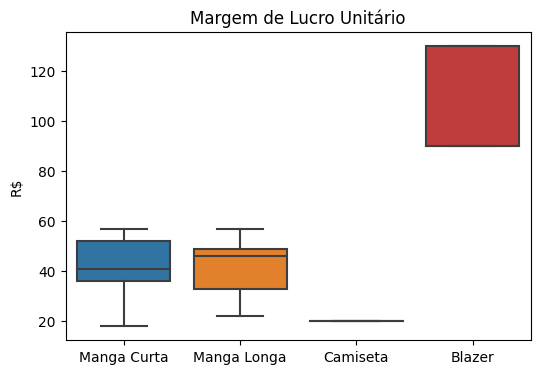

In [345]:
fig, ax = plt.subplots(figsize=(6,4))
plt.title('Margem de Lucro Unitário')
sns.boxplot(data=df, x='categoria', y='margem_lucro_unit')
plt.ylabel('R$')
plt.xlabel(None)
plt.show()

In [350]:
margem = df[['data','categoria', 'descricao', 'tamanho','item_quantidade','custoUnitario','valor_unitario', 'margem_lucro_unit', 'cliente','nf_valor_venda']]
margem.head()

,data,categoria,descricao,tamanho,item_quantidade,custoUnitario,valor_unitario,margem_lucro_unit,cliente,nf_valor_venda
0,2/16/2021,Manga Curta,Paeonia,M,1,75,112,37,Gleichner LLC,240.10
1,6/10/2023,Manga Curta,Paeonia,M,1,75,112,37,"Reichel, Gulgowski and Turner",5359.55
2,6/24/2021,Manga Curta,Paeonia,M,1,75,112,37,Cruickshank-Torp,951.20
3,2/17/2021,Manga Curta,Paeonia,M,1,75,112,37,King-Simonis,1598.05
4,8/15/2022,Manga Curta,Paeonia,M,1,75,112,37,"O'Connell, Wyman and Gleichner",7520.45


In [327]:
marg_camiseta = margem.groupby(['categoria', 'cliente'])['nf_valor_venda'].sum().reset_index().query("categoria =='Camiseta'")

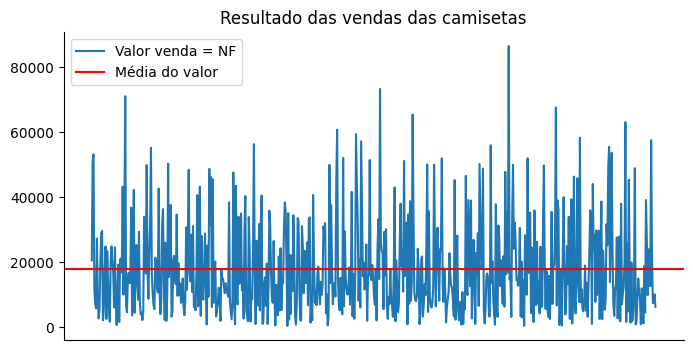

In [340]:
media = marg_camiseta['nf_valor_venda'].mean()

marg_camiseta['nf_valor_venda'].plot(kind='line', figsize=(8, 4), title='Resultado das vendas das camisetas', label='Valor venda = NF')
plt.axhline(y = media, color = 'r', linestyle = '-', label='Média do valor')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks([])  # Oculta os valores do eixo x
plt.legend()
plt.show()

In [346]:
marg_camiseta.head()

,categoria,cliente,nf_valor_venda
618,Camiseta,"Abernathy, Grady and Daugherty",20450.70
619,Camiseta,"Abshire, Adams and Wiza",50711.40
620,Camiseta,Abshire-Kunze,53085.40
621,Camiseta,"Altenwerth, Oberbrunner and Pouros",11938.00
622,Camiseta,Anderson Inc,6978.95


from matplotlib import pyplot as plt
_df_33['nf_valor_venda'].plot(kind='hist', bins=20, title='nf_valor_venda')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('cliente').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['nf_valor_venda'].plot(kind='line', figsize=(8, 4), title='nf_valor_venda')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_36['cliente'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_36, x='nf_valor_venda', y='cliente', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [276]:
df.columns

Index(['vendas_id', 'data', 'nfe', 'cliente_id', 'nf_desconto',
       'nf_valor_bruto', 'nf_valor_venda', 'itens_venda_id', 'produto_id',
       'item_quantidade', 'valor_unitario', 'valor_bruto', 'valor_desconto',
       'cliente', 'cidade', 'estado', 'UF', 'Regiao', 'vendedor_id',
       'supervisor_id', 'nome_supervisor', 'gerente_id', 'nome_gerente',
       'nome_vendedor', 'categoria_id', 'descricao', 'tamanho',
       'custoUnitario', 'categoria'],
      dtype='object')